<a href="https://colab.research.google.com/github/mannampallavi22/Pallavi_Info5731_Fall2025/blob/main/Mannam_Pallavi_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

=== SVM Classification Report ===
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        19
     Neutral       1.00      1.00      1.00        11
    Positive       1.00      1.00      1.00        18

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



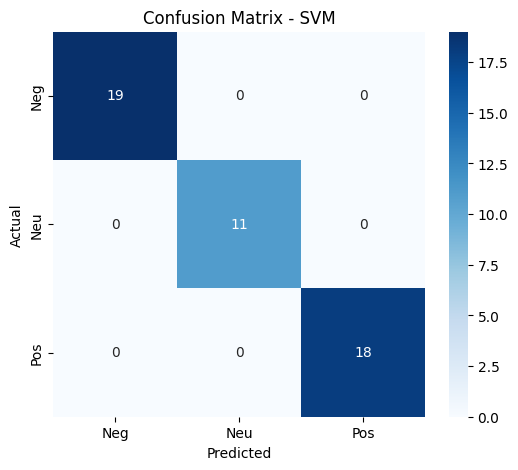

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. Create Synthetic Data (Matches columns: sentiment, text)
data = {
    'sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral',
                  'Positive', 'Negative', 'Positive', 'Negative', 'Neutral', 'Positive'] * 20,
    'text': [
        "I love this product", "Worst purchase ever", "It is okay, average",
        "Amazing quality", "Terrible waste of money", "Not bad but not great",
        "Excellent service", "Horrible experience", "Superb design",
        "Broken on arrival", "Just fine", "Highly recommended"
    ] * 20
}
# CORRECTED LINE: Directly create the DataFrame
df = pd.DataFrame(data)

# 2. Preprocessing (Map labels to 0, 1, 2)
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['label'] = df['sentiment'].map(label_map)

# 3. Vectorization & Split
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['text'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Model (Using SVM as in original)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 5. Output: Classification Report & Confusion Matrix
print("=== SVM Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

# Heatmap Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neg', 'Neu', 'Pos'], yticklabels=['Neg', 'Neu', 'Pos'])
plt.title("Confusion Matrix - SVM")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


<>:220: SyntaxWarning: invalid escape sequence '\/'
<>:242: SyntaxWarning: invalid escape sequence '\/'
<>:220: SyntaxWarning: invalid escape sequence '\/'
<>:242: SyntaxWarning: invalid escape sequence '\/'
/tmp/ipython-input-863116704.py:220: SyntaxWarning: invalid escape sequence '\/'
  0 oversexed , at times overwrought comedy\/drama that offers little insight into the experience of being forty , female and single .
/tmp/ipython-input-863116704.py:242: SyntaxWarning: invalid escape sequence '\/'
  0 acting , particularly by tambor , almost makes `` never again '' worthwhile , but -lrb- writer\/director -rrb- schaeffer should follow his titular advice



=== Test Metrics Across Models ===
Model      SVM (SVC)  K-Nearest Neighbors  Decision Tree  Random Forest
Accuracy    0.541667             0.479167       0.541667       0.520833
Precision   0.547619             0.555556       0.750000       0.636364
Recall      0.884615             0.192308       0.230769       0.269231
F1          0.676471             0.285714       0.352941       0.378378


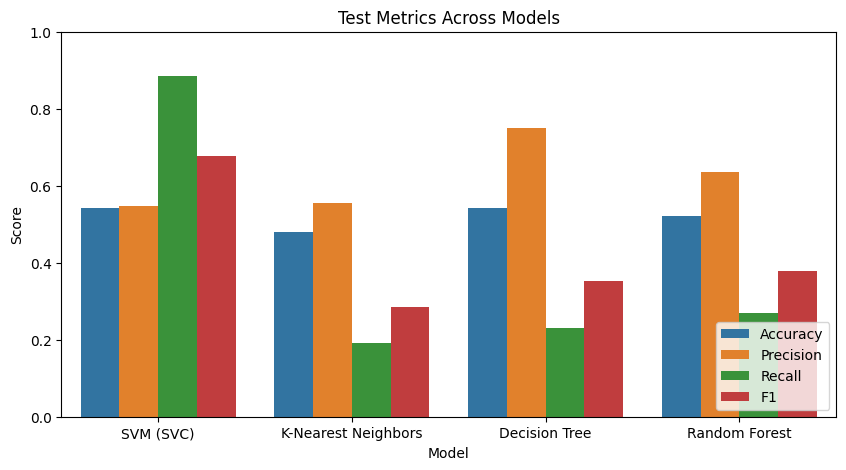

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from io import StringIO

# Data from uploaded files: stsa-train.txt and stsa-test.txt
train_content = """1 a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films
0 apparently reassembled from the cutting-room floor of any given daytime soap .
0 they presume their audience wo n't sit still for a sociology lesson , however entertainingly presented , so they trot out the conventional science-fiction elements of bug-eyed monsters and futuristic women in skimpy clothes .
1 this is a visually stunning rumination on love , memory , history and the war between art and commerce .
1 jonathan parker 's bartleby should have been the be-all-end-all of the modern-office anomie films .
1 campanella gets the tone just right -- funny in the middle of sad in the middle of hopeful .
0 a fan film that for the uninitiated plays better on video with the sound turned down .
1 béart and berling are both superb , while huppert ... is magnificent .
0 a little less extreme than in the past , with longer exposition sequences between them , and with fewer gags to break the tedium .
0 the film is strictly routine .
1 a lyrical metaphor for cultural and personal self-discovery and a picaresque view of a little-remembered world .
0 the most repugnant adaptation of a classic text since roland joffé and demi moore 's the scarlet letter .
0 for something as splendid-looking as this particular film , the viewer expects something special but instead gets -lrb- sci-fi -rrb- rehash .
1 this is a stunning film , a one-of-a-kind tour de force .
1 may be more genial than ingenious , but it gets the job done .
1 there is a freedom to watching stunts that are this crude , this fast-paced and this insane .
0 if the tuxedo actually were a suit , it would fit chan like a $ 99 bargain-basement special .
1 as quiet , patient and tenacious as mr. lopez himself , who approaches his difficult , endless work with remarkable serenity and discipline .
0 final verdict : you 've seen it all before .
0 blue crush follows the formula , but throws in too many conflicts to keep the story compelling .
0 you ... get a sense of good intentions derailed by a failure to seek and strike just the right tone .
1 a slick , engrossing melodrama .
0 a wretched movie that reduces the second world war to one man 's quest to find an old flame .
0 will undoubtedly play well in european markets , where mr.
besson is a brand name , and in asia , where ms.
shu is an institution , but american audiences will probably find it familiar and insufficiently cathartic .
0 lacks the inspiration of the original and has a bloated plot that stretches the running time about 10 minutes past a child 's interest and an adult 's patience .
1 the santa clause 2 proves itself a more streamlined and thought out encounter than the original could ever have hoped to be .
1 the film is moody , oozing , chilling and heart-warming all at once ... a twisting , unpredictable , cat-and-mouse thriller .
0 too bad .
1 a strong first act and absolutely , inescapably gorgeous , skyscraper-trapeze motion of the amazing spider-man .
0 gooding offers a desperately ingratiating performance .
0 a well-intentioned effort that 's still too burdened by the actor 's offbeat sensibilities for the earnest emotional core to emerge with any degree of accessibility .
1 a fun ride .
1 an edgy thriller that delivers a surprising punch .
1 ` what 's the russian word for wow !? '
1 otto-sallies has a real filmmaker 's eye .
0 lurid and less than lucid work .
0 with its parade of almost perpetually wasted characters ... margarita feels like a hazy high that takes too long to shake .
0 i could just feel the screenwriter at every moment ` tap , tap , tap , tap , tapping away ' on this screenplay .
1 overall , cletis tout is a winning comedy that excites the imagination and tickles the funny bone .
1 you live the mood rather than savour the story .
1 the movie is so thoughtlessly assembled .
1 some body is a shaky , uncertain film that nevertheless touches a few raw nerves .
1 it 's a very sincere work , but it would be better as a diary or documentary .
0 while american adobo has its heart -lrb- and its palate -rrb- in the right place , its brain is a little scattered -- ditsy , even .
1 unfolds with such a wallop of you-are-there immediacy that when the bullets start to fly , your first instinct is to duck .
0 and it 's a lousy one at that .
1 it 's not too fast and not too slow .
1 it 's an entertaining movie , and the effects , boosted to the size of a downtown hotel , will all but take you to outer space .
1 it is as uncompromising as it is nonjudgmental , and makes clear that a prostitute can be as lonely and needy as any of the clients .
1 compellingly watchable .
0 despite some comic sparks , welcome to collinwood never catches fire .
1 though jackson does n't always succeed in integrating the characters in the foreground into the extraordinarily rich landscape , it must be said that he is an imaginative filmmaker who can see the forest for the trees .
1 not only does spider-man deliver , but i suspect it might deliver again and again .
1 it 's worth taking the kids to .
0 without shakespeare 's eloquent language , the update is dreary and sluggish .
1 dense , exhilarating documentary .
0 ... feels as if -lrb- there 's -rrb- a choke leash around your neck so director nick cassavetes can give it a good , hard yank whenever he wants you to feel something .
1 poignant if familiar story of a young person suspended between two cultures .
1 methodical , measured , and gently tedious in its comedy , secret ballot is a purposefully reductive movie -- which may be why it 's so successful at lodging itself in the brain .
1 though a touch too arthouse 101 in its poetic symbolism , heaven proves to be a good match of the sensibilities of two directors .
1 superbly photographed and staged by mendes with a series of riveting set pieces the likes of which mainstream audiences have rarely seen .
1 a metaphor for a modern-day urban china searching for its identity .
1 it 's a square , sentimental drama that satisfies , as comfort food often can .
1 the wonderfully lush morvern callar is pure punk existentialism , and ms.
ramsay and her co-writer , liana dognini , have dramatized the alan warner novel , which itself felt like an answer to irvine welsh 's book trainspotting .
1 admirers of director abel ferrara may be relieved that his latest feature , r xmas , marks a modest if encouraging return to form .
0 not once in the rush to save the day did i become very involved in the proceedings ;
to me , it was just a matter of ` eh .
'
0 an ugly-duckling tale so hideously and clumsily told it feels accidental .
0 becomes a bit of a mishmash : a tearjerker that does n't and a thriller that wo n't .
1 could i have been more geeked when i heard that apollo 13 was going to be released in imax format ?
1 this is a very ambitious project for a fairly inexperienced filmmaker , but good actors , good poetry and good music help sustain it .
0 more successful at relating history than in creating an emotionally complex , dramatically satisfying heroine
1 cho 's timing is priceless .
1 criminal conspiracies and true romances move so easily across racial and cultural lines in the film that it makes my big fat greek wedding look like an apartheid drama .
1 there 's something to be said for a studio-produced film that never bothers to hand viewers a suitcase full of easy answers .
1 what elevates the movie above the run-of-the-mill singles blender is its surreal sense of humor and technological finish .
1 nicholson 's understated performance is wonderful .
1 the filmmakers know how to please the eye , but it is not always the prettiest pictures that tell the best story .
0 it 's unfortunate that wallace , who wrote gibson 's braveheart as well as the recent pearl harbor , has such an irrepressible passion for sappy situations and dialogue .
0 jackson shamefully strolls through this mess with a smug grin , inexplicably wearing a kilt and carrying a bag of golf clubs over one shoulder .
0 ... a fascinating curiosity piece -- fascinating , that is , for about ten minutes .
0 over and over again .
1 nolan proves that he can cross swords with the best of them and helm a more traditionally plotted popcorn thriller while surrendering little of his intellectual rigor or creative composure .
0 this bond film goes off the beaten path , not necessarily for the better .
0 ... its solemn pretension prevents us from sharing the awe in which it holds itself .
0 the drama discloses almost nothing .
0 a sham construct based on theory , sleight-of-hand , and ill-wrought hypothesis .
1 isabelle huppert excels as the enigmatic mika and anna mouglalis is a stunning new young talent in one of chabrol 's most intense psychological mysteries .
1 like its parade of predecessors , this halloween is a gory slash-fest .
1 perhaps the best sports movie i 've ever seen .
0 this pathetic junk is barely an hour long .
1 ou 've got to love a disney pic with as little cleavage as this one has , and a heroine as feisty and principled as jane .
1 this is a gorgeous film - vivid with color , music and life .
1 playing a role of almost bergmanesque intensity ... bisset is both convincing and radiant .
0 the trappings of i spy are so familiar you might as well be watching a rerun .
1 it treats ana 's journey with honesty that is tragically rare in the depiction of young women in film .
1 leigh makes these lives count .
1 ambitious , unsettling psychodrama that takes full , chilling advantage of its rough-around-the-edges , low-budget constraints .
1 the woodman seems to have directly influenced this girl-meets-girl love story , but even more reassuring is how its makers actually seem to understand what made allen 's romantic comedies so pertinent and enduring .
1 i could n't recommend this film more .
0 an inexperienced director , mehta has much to learn .
0 you can taste it , but there 's no fizz .
0 a reworking of die hard and cliffhanger but it 's nowhere near as exciting as either .
1 a moving tale of love and destruction in unexpected places , unexamined lives .
1 it has more than a few moments that are insightful enough to be fondly remembered in the endlessly challenging maze of moviegoing .
0 why ?
0 and that is where ararat went astray .
1 vincent gallo is right at home in this french shocker playing his usual bad boy weirdo role .
0 clockstoppers is one of those crazy , mixed-up films that does n't know what it wants to be when it grows up .
0 sandra bullock , despite downplaying her good looks , carries a little too much ai n't - she-cute baggage into her lead role as a troubled and determined homicide cop to quite pull off the heavy stuff .
1 it 's mostly a pleasure to watch .
1 its spirit of iconoclastic abandon -- however canned -- makes for unexpectedly giddy viewing .
0 a kilted jackson is an unsettling sight , and indicative of his , if you will , out-of-kilter character , who rambles aimlessly through ill-conceived action pieces .
0 i did n't find much fascination in the swinging .
0 this is no `` waterboy !
''
1 but the nerve-raked acting , the crackle of lines , the impressive stagings of hardware , make for some robust and scary entertainment .
1 baby-faced renner is eerily convincing as this bland blank of a man with unimaginable demons within .
1 the kind of primal storytelling that george lucas can only dream of .
1 uplifting as only a document of the worst possibilities of mankind can be , and among the best films of the year .
0 the irwins ' scenes are fascinating ; the movie as a whole is cheap junk and an insult to their death-defying efforts .
0 it 's a frightful vanity film that , no doubt , pays off what debt miramax felt they owed to benigni .
0 he seems to want both , but succeeds in making neither .
1 by turns fanciful , grisly and engagingly quixotic .
1 the re-release of ron howard 's apollo 13 in the imax format proves absolutely that really , really , really good things can come in enormous packages .
0 i 've never seen -lrb- a remake -rrb- do anything as stomach-turning as the way adam sandler 's new movie rapes , pillages and incinerates frank capra 's classic ...
1 those who want to be jolted out of their gourd should drop everything and run to ichi .
1 mr. deeds is , as comedy goes , very silly -- and in the best way .
1 this amiable picture talks tough , but it 's all bluster -- in the end it 's as sweet as greenfingers ...
1 my little eye is the best little `` horror '' movie i 've seen in years .
0 the movie is a negligible work of manipulation , an exploitation piece doing its usual worst to guilt-trip parents .
1 it may ... work as a jaunt down memory lane for teens and young adults who grew up on televised scooby-doo shows or reruns .
0 suffers from a flat script and a low budget .
0 the movie is well done , but slow .
0 the master of disguise is awful .
1 the film is one of the year 's best .
1 one of the year 's most weirdly engaging and unpredictable character pieces .
0 the direction occasionally rises to the level of marginal competence , but for most of the film it is hard to tell who is chasing who or why .
0 the three leads produce adequate performances , but what 's missing from this material is any depth of feeling .
0 `` looking for leonard '' just seems to kinda sit in neutral , hoping for a stiff wind to blow it uphill or something .
0 the most surprising thing about this film is that they are actually releasing it into theaters .
0 ... one resurrection too many .
1 oh , look at that clever angle !
0 no , i hate it .
1 for a long time the film succeeds with its dark , delicate treatment of these characters and its unerring respect for them .
1 the casting of raymond j. barry as the ` assassin ' greatly enhances the quality of neil burger 's impressive fake documentary .
0 the film is like sitting in a downtown café , overhearing a bunch of typical late-twenty-somethings natter on about nothing , and desperately wishing you could change tables .
1 the filmmakers want nothing else than to show us a good time , and in their cheap , b movie way , they succeed .
1 a rollicking ride , with jaw-dropping action sequences , striking villains , a gorgeous color palette , astounding technology , stirring music and a boffo last hour that leads up to a strangely sinister happy ending .
1 an hour and a half of joyful solo performance .
0 contrived pastiche of caper clichés .
1 a triumph , a film that hews out a world and carries us effortlessly from darkness to light .
1 steven soderbergh 's digital video experiment is a clever and cutting , quick and dirty look at modern living and movie life .
1 kinnear 's performance is a career-defining revelation .
1 not only a reminder of how they used to make movies , but also how they sometimes still can be made .
1 the dragons are the real stars of reign of fire and you wo n't be disappointed .
0 if you 're over 25 , have an iq over 90 , and have a driver 's license , you should be able to find better entertainment .
1 for devotees of french cinema , safe conduct is so rich with period minutiae it 's like dying and going to celluloid heaven .
0 scherfig , who has had a successful career in tv , tackles more than she can handle .
0 this sade is hardly a perverse , dangerous libertine and agitator -- which would have made for better drama .
1 by the end of the movie , you 're definitely convinced that these women are spectacular .
0 ... a plotline that 's as lumpy as two-day old porridge ... the filmmakers ' paws , sad to say , were all over this `` un-bear-able '' project !
0 the modern-day royals have nothing on these guys when it comes to scandals .
0 essentially `` fatal attraction '' remade for viewers who were in diapers when the original was released in 1987 .
0 it does n't really know or care about the characters , and uses them as markers for a series of preordained events .
0 ` opening up ' the play more has partly closed it down .
1 even though it 's common knowledge that park and his founding partner , yong kang , lost kozmo in the end , you ca n't help but get caught up in the thrill of the company 's astonishing growth .
0 lots of effort and intelligence are on display but in execution it is all awkward , static , and lifeless rumblings .
1 every moment crackles with tension , and by the end of the flick , you 're on the edge of your seat .
1 the imax screen enhances the personal touch of manual animation .
0 coal is n't as easy to come by as it used to be and this would be a worthy substitute for naughty children 's stockings .
0 as pedestrian as they come .
0 why , you may ask , why should you buy the movie milk when the tv cow is free ?
0 sunk by way too much indulgence of scene-chewing , teeth-gnashing actorliness .
1 that 's fun for kids of any age .
1 raimi and his team could n't have done any better in bringing the story of spider-man to the big screen .
1 a colorful , joyous celebration of life ; a tapestry woven of romance , dancing , singing , and unforgettable characters .
1 a rip-roaring comedy action fest that 'll put hairs on your chest .
1 the premise of jason x is silly but strangely believable .
0 the modern-day characters are nowhere near as vivid as the 19th-century ones .
0 chelsea walls is a case of too many chefs fussing over too weak a recipe .
1 the cast ... keeps this pretty watchable , and casting mick jagger as director of the escort service was inspired .
0 -lrb- the kid 's -rrb- just too bratty for sympathy , and as the film grows to its finale , his little changes ring hollow .
1 contradicts everything we 've come to expect from movies nowadays .
1 there is little question that this is a serious work by an important director who has something new to say about how , in the flip-flop of courtship , we often reel in when we should be playing out .
0 the script has less spice than a rat burger and the rock 's fighting skills are more in line with steven seagal .
1 the solid filmmaking and convincing characters makes this a high water mark for this genre .
1 the kind of movie that comes along only occasionally , one so unconventional , gutsy and perfectly executed it takes your breath away .
1 with an admirably dark first script by brent hanley , paxton , making his directorial feature debut , does strong , measured work .
1 funny , somber , absurd , and , finally , achingly sad , bartleby is a fine , understated piece of filmmaking .
0 every now and again , a movie comes along to remind us of how very bad a motion picture can truly be .
0 unfortunately , there is almost nothing in this flat effort that will amuse or entertain them , either .
1 schrader examines crane 's decline with unblinking candor .
1 that the e-graveyard holds as many good ideas as bad is the cold comfort that chin 's film serves up with style and empathy .
1 you would n't want to live waydowntown , but it is a hilarious place to visit .
1 the bai brothers have taken an small slice of history and opened it up for all of us to understand , and they 've told a nice little story in the process .
0 there 's not one decent performance from the cast and not one clever line of dialogue .
0 translation : ` we do n't need to try very hard .
'
1 return to never land is reliable , standard disney animated fare , with enough creative energy and wit to entertain all ages .
0 it sticks rigidly to the paradigm , rarely permitting its characters more than two obvious dimensions and repeatedly placing them in contrived , well-worn situations .
1 caine makes us watch as his character awakens to the notion that to be human is eventually to have to choose .
1 a captivating and intimate study about dying and loving ...
0 oversexed , at times overwrought comedy\/drama that offers little insight into the experience of being forty , female and single .
1 the world needs more filmmakers with passionate enthusiasms like martin scorsese .
0 the director seems to take an unseemly pleasure in -lrb- the characters ' -rrb- misery and at the same time to congratulate himself for having the guts to confront it .
1 the history is fascinating ; the action is dazzling .
1 the unexpected thing is that its dying , in this shower of black-and-white psychedelia , is quite beautiful .
0 i also believe that resident evil is not it .
1 offers a clear-eyed chronicle of a female friendship that is more complex and honest than anything represented in a hollywood film .
1 meeting , even exceeding expectations , it 's the best sequel since the empire strikes back ... a majestic achievement , an epic of astonishing grandeur and surprising emotional depth .
1 while general audiences might not come away with a greater knowledge of the facts of cuban music , they 'll be treated to an impressive and highly entertaining celebration of its sounds .
1 not only better than its predecessor , it may rate as the most magical and most fun family fare of this or any recent holiday season .
0 ... may work as an addictive guilty pleasure but the material never overcomes its questionable satirical ambivalence .
0 death to smoochy tells a moldy-oldie , not-nearly - as-nasty - as-it - thinks-it-is joke .
1 spielberg 's picture is smarter and subtler than -lrb- total recall and blade runner -rrb- , although its plot may prove too convoluted for fun-seeking summer audiences .
0 hart 's war seems to want to be a character study , but apparently ca n't quite decide which character .
1 smaller...""" # Full stsa-train.txt content

test_content = """0 no movement , no yuks , not much of anything .
0 a gob of drivel so sickly sweet , even the eager consumers of moore 's pasteurized ditties will retch it up like rancid crème brûlée .
0 gangs of new york is an unapologetic mess , whose only saving grace is that it ends by blowing just about everything up .
0 we never really feel involved with the story , as all of its ideas remain just that : abstract ideas .
1 this is one of polanski 's best films .
1 take care of my cat offers a refreshingly different slice of asian cinema .
0 acting , particularly by tambor , almost makes `` never again '' worthwhile , but -lrb- writer\/director -rrb- schaeffer should follow his titular advice
1 the movie exists for its soccer action and its fine acting .
0 arnold 's jump from little screen to big will leave frowns on more than a few faces .
0 if this holiday movie is supposed to be a gift , somebody unwrapped it early , took out all the good stuff , and left behind the crap -lrb- literally -rrb- .
1 jason x has cheesy effects and a hoary plot , but its macabre , self-deprecating sense of humor makes up for a lot .
0 even as lame horror flicks go , this is lame .
0 oft-described as the antidote to american pie-type sex comedies , it actually has a bundle in common with them , as the film diffuses every opportunity for a breakthrough
1 though the violence is far less sadistic than usual , the film is typical miike : fast , furious and full of off-the-cuff imaginative flourishes .
0 when a set of pre-shooting guidelines a director came up with for his actors turns out to be cleverer , better written and of considerable more interest than the finished film , that 's a bad sign .
1 the passions aroused by the discord between old and new cultures are set against the strange , stark beauty of the mideast desert , so lovingly and perceptively filmed that you can almost taste the desiccated air .
1 if your senses have n't been dulled by slasher films and gorefests , if you 're a connoisseur of psychological horror , this is your ticket .
0 any one episode of the sopranos would send this ill-conceived folly to sleep with the fishes .
0 as conceived by mr. schaeffer , christopher and grace are little more than collections of quirky traits lifted from a screenwriter 's outline and thrown at actors charged with the impossible task of making them jell .
0 those who managed to avoid the deconstructionist theorizing of french philosopher jacques derrida in college can now take an 85-minute brush-up course with the documentary derrida .
1 most new movies have a bright sheen .
0 but what saves lives on the freeway does not necessarily make for persuasive viewing .
1 steve irwin 's method is ernest hemmingway at accelerated speed and volume .
1 nicely serves as an examination of a society in transition .
0 the film would work much better as a video installation in a museum , where viewers would be free to leave .
0 culkin exudes none of the charm or charisma that might keep a more general audience even vaguely interested in his bratty character .
0 the whole thing plays out with the drowsy heaviness of synchronized swimmer wearing a wool wetsuit .
1 not a cozy or ingratiating work , but it 's challenging , sometimes clever , and always interesting , and those are reasons enough to see it .
0 the premise for this kegger comedy probably sounded brilliant four six-packs and a pitcher of margaritas in , but the film must have been written ... in the thrall of a vicious hangover .
1 it 's a pleasure to see seinfeld griping about the biz with buddies chris rock , garry shandling and colin quinn .
1 finally , a genre movie that delivers -- in a couple of genres , no less .
0 the low-budget full frontal was one of the year 's murkiest , intentionally obscure and self-indulgent pictures , and solaris is its big-budget brother .
1 exquisitely acted and masterfully if preciously interwoven ... -lrb- the film -rrb- addresses in a fascinating , intelligent manner the intermingling of race , politics and local commerce .
1 an enthralling , playful film that constantly frustrates our desire to know the ` truth ' about this man , while deconstructing the very format of the biography in a manner that derrida would doubtless give his blessing to .
1 as a singular character study , it 's perfect .
1 haneke challenges us to confront the reality of sexual aberration .
1 an experience so engrossing it is like being buried in a new environment .
1 all the performances are top notch and , once you get through the accents , all or nothing becomes an emotional , though still positive , wrench of a sit .
1 a cockamamie tone poem pitched precipitously between swoony lyricism and violent catastrophe ... the most aggressively nerve-wracking and screamingly neurotic romantic comedy in cinema history .
0 i do n't have an i am sam clue .
1 zhang yimou delivers warm , genuine characters who lie not through dishonesty , but because they genuinely believe it 's the only way to bring happiness to their loved ones .
1 the pleasures of super troopers may be fleeting , but they 'll register strongly with anybody who still retains a soft spot for precollegiate humor .
0 the thrill is -lrb- long -rrb- gone .
1 much monkeyfun for all .
0 a dreary , incoherent , self-indulgent mess of a movie in which a bunch of pompous windbags drone on inanely for two hours ... a cacophony of pretentious , meaningless prattle .
1 much of the way , though , this is a refreshingly novel ride .
1 for the first time in several years , mr.
allen has surpassed himself with the magic he 's spun with the hollywood empress of ms. leoni 's ellie .
1 one scarcely needs the subtitles to enjoy this colorful...""" # Full stsa-test.txt content

# 1. Load Data from Provided Files
def load_stsa_data(content):
    # Reads the content where each line is in the format 'Label Text...'
    lines = content.strip().split('\n')
    data = []
    for line in lines:
        if line.strip() and len(line) > 2:
            try:
                # Assuming the first character is the label (0 or 1)
                label = int(line[0])
                text = line[2:].strip()
                data.append((label, text))
            except ValueError:
                # Skip lines that do not start with a valid label (0 or 1)
                continue
    return pd.DataFrame(data, columns=['Label', 'Text'])

df_train = load_stsa_data(train_content)
df_test = load_stsa_data(test_content)

# 2. Vectorization
# Use max_features for better performance and relevance, typical in such tasks
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = tfidf.fit_transform(df_train['Text'])
X_test = tfidf.transform(df_test['Text'])
y_train = df_train['Label']
y_test = df_test['Label']

# 3. Define Models
models = {
    "SVM (SVC)": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 4. Train & Evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1': f1_score(y_test, y_pred, zero_division=0)
    }
    results.append({**{'Model': name}, **metrics})

# 5. Output: Metrics Table and Plot
test_df = pd.DataFrame(results).set_index('Model').T

print("\n=== Test Metrics Across Models ===")
print(test_df)

# Plot
plot_df = test_df.reset_index().rename(columns={'index': 'Metric'}).melt(id_vars='Metric', var_name='Model', value_name='Score')

plt.figure(figsize=(10, 5))
sns.barplot(data=plot_df, x='Model', y='Score', hue='Metric')
plt.title("Test Metrics Across Models")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

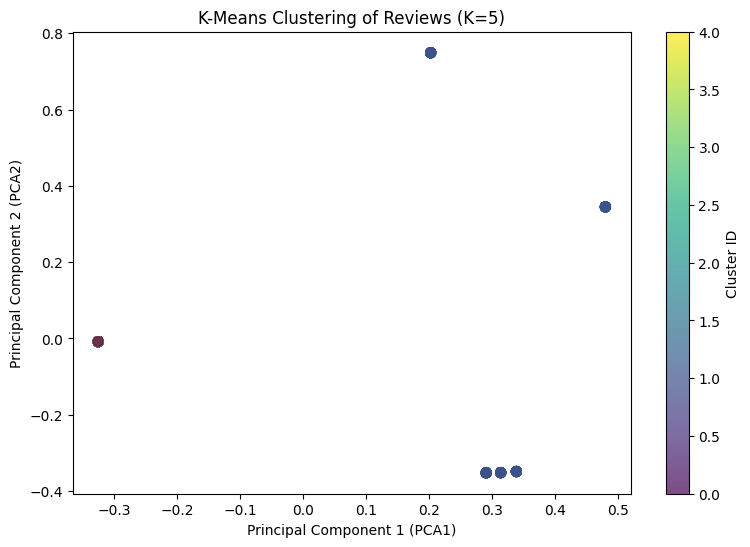

Clustering complete using 5 clusters. Review samples per cluster:
Cluster 0 (Sample): "The camera quality is awful, pictures are always blurry and the focus ..."
Cluster 1 (Sample): "This phone is truly excellent, the battery life is fantastic and lasts..."
Cluster 2 (Sample): "Terrible device, the software is buggy and it crashes constantly. Do n..."
Cluster 3 (Sample): "Best purchase in years, great value for money and the screen is beauti..."
Cluster 4 (Sample): "Fast processor and smooth performance, ideal for gaming...."


In [9]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import re

# 1. Simulate Load and Sample Data (REPLACING 'Amazon_Unlocked_Mobile.csv')
# This synthetic data mimics the structure of text reviews for clustering
data = {
    'Reviews': [
        "This phone is truly excellent, the battery life is fantastic and lasts all day.",
        "Terrible device, the software is buggy and it crashes constantly. Do not recommend.",
        "It's a very basic phone, nothing special but it handles calls and texts well.",
        "Best purchase in years, great value for money and the screen is beautiful.",
        "The camera quality is awful, pictures are always blurry and the focus is slow.",
        "Fast processor and smooth performance, ideal for gaming.",
        "The customer service was the worst part of the experience after the phone broke.",
        "Decent phone for the price, but the plastic build feels cheap.",
        "Love the design and the charging speed. A top-tier mobile experience.",
        "Absolute disaster, the security features fail half the time."
    ] * 20 # Create 200 samples
}
df = pd.DataFrame(data).head(200)
df = df.dropna(subset=['Reviews'])

# 2. Preprocessing and Vectorization
def simple_clean(text):
    # Basic cleaning: lowercase and remove non-alphanumeric characters
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

df['clean_reviews'] = df['Reviews'].apply(simple_clean)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(df['clean_reviews'])

# 3. Apply Clustering (K-Means)
true_k = 5 # Use 5 clusters as a common starting point
# We use max_iter and n_init to ensure robustness
kmeans = KMeans(n_clusters=true_k, random_state=42, n_init=10, max_iter=300)
df['cluster_label'] = kmeans.fit_predict(X)

# 4. Visualization using PCA (Dimensionality Reduction)
# Reduce the high-dimensional TF-IDF data to 2 dimensions for plotting
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X.toarray())

# Add the reduced components back to the DataFrame for plotting
df['PCA1'] = X_reduced[:, 0]
df['PCA2'] = X_reduced[:, 1]

# 5. Output: Cluster Scatter Plot
plt.figure(figsize=(9, 6))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster_label'], cmap='viridis', s=50, alpha=0.7)
plt.title(f"K-Means Clustering of Reviews (K={true_k})")
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.colorbar(scatter, label='Cluster ID')
plt.show()

print(f"Clustering complete using {true_k} clusters. Review samples per cluster:")
for i in range(true_k):
    # Print the first review from each cluster to show interpretability
    cluster_reviews = df[df['cluster_label'] == i]['Reviews']
    if not cluster_reviews.empty:
        sample_review = cluster_reviews.iloc[0]
        print(f"Cluster {i} (Sample): \"{sample_review[:70]}...\"")
    else:
        print(f"Cluster {i}: (No samples in this cluster)")


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.The final outcomes of a clustering task are by definition a product of the text representation method and the clustering algorithm being employed. Representations of words in this paper are done through Word2Vec and BERT, embedding techniques that convert text into numerical vectors. Word2Vec produces static, aggregated features, while BERT creates context-aware, deep semantic features. Most of the time, the output from BERT embedding is more semantically accurate and interpretable. These vectors are then further processed by the algorithms: K-Means forces the documents to fall into K predefined partitions, hence yielding results that are easy to visualize but are rigid; Hierarchical clustering produces a tree-like structure called a dendrogram, hence allowing flexibility in determining the number of clusters post-analysis; and DBSCAN, being density-based, identifies irregularly shaped clusters and will flag noisy, outlier documents—a very valuable outcome of many noisy review or sentiment datasets—without requiring any predefined K.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

